# Logistic Regression 

## Sobre LR

Regressão logistica(RL) é um classificador linear. 

**A principal diferença entre Regressão linear e Regressão logistica ?**
*   A linear é utilizada para estivar valores contínuo como o preço de uma casa. 
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
Nosos objetivo é encontra os valores dos parâmetros $\theta_0, \theta_1, \theta_2$, etc, onde $\theta_0$ é o ponto que intercepta a reta em x=0. De forma geral  podemos escrever como :
$$
ℎ_\theta(𝑥) = \theta^TX
$$


* já a logistica é utilizada para estimar variáveis categoricas  como qual a cor da casa.

A RL fita uma curva na forma parecida com "s", descrita pela função sigmoid $\sigma$:

$$
ℎ = \sigma(\theta, 𝑥)  =  \sigma({\theta^TX}) =  \frac {e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +...)}}{1 + e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +\cdots)}}
$$
Ou:
$$
\text{Probabilidade da classe ser 1} =  P(Y=1|X) \\
 = \sigma({\theta^TX}) \\
 = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} \\
 = \frac{1}{1+e^{-\theta^TX}}
$$

Ilustração:

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">



## Import

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

## Customer churn( taxa de cancelamento ) 

**Sobre o conjunto de dados**

Usaremos um conjunto de dados de telecomunicações para prever a rotatividade dos clientes. 

Este é um conjunto de dados com o histórico do cliente em que cada linha representa um cliente.

Normalmente é mais barato manter clientes do que adquirir novos, então o foco dessa análise é prever os clientes que permanecerão na empresa.

Esse conjunto de dados fornece informações para ajudá-lo a prever qual comportamento o ajudará a reter clientes. Você pode analisar todos os dados relevantes do cliente e desenvolver programas de retenção de clientes focados.

O conjunto de dados inclui informações sobre:

* Clientes que saíram no último mês – a coluna se chama Churn
* Serviços para os quais cada cliente se inscreveu – telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico e streaming de TV e filmes
* Informações da conta do cliente - há quanto tempo ele é cliente, contrato, método de pagamento, cobrança sem papel, cobrança mensal e cobrança total
* Informações demográficas sobre os clientes – sexo, faixa etária e se possuem parceiros e dependentes

Carregando os dados :

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


Pre procesando os dados :

Vamos selecionar algumas categorias para a modelagem. Além disso, alteraremos o tipo de dados de destino para inteiros, pois é um requisito do algoritmo skitlearn:

In [3]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']] # colunas selecionadas 
df['churn'] = df['churn'].astype('int') # mudando  para inteiro.
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


Vamos definer quem é a variável dependente(Y) e independente (X)

In [4]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

Foi usada a função "np.asarray()" para pegar apenas os numeros da tabelas

In [5]:
Y = np.asarray(df['churn'])
Y [0:5]

array([1, 1, 0, 0, 0])

Normalizando o data set

In [6]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Treino

**Splitando os dados de treino e teste**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


**Modelo**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Agora vamo usar os dados de teste para predizer e avalaiar nosso modelo 

In [12]:
y_predição = LR.predict(X_test)
y_predição

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

Tesmo a cima a predição das classes , mas se quisemos a probabilidade de ele pertencer nessa classe 

In [10]:
y_prob = LR.predict_proba(X_test)
y_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

Para examinar a acuracia da predição iremos uisar o indice de jaccard.


Podemos definir jaccard como o tamanho da interseção dividido pelo tamanho da união dos dois conjuntos de rótulos. Se todo o conjunto de rótulos previstos para uma amostra corresponder estritamente ao verdadeiro conjunto de rótulos, a precisão do subconjunto será 1,0; caso contrário, é 0,0.

In [13]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predição,pos_label=0)

0.7058823529411765

### Matriz de confução 

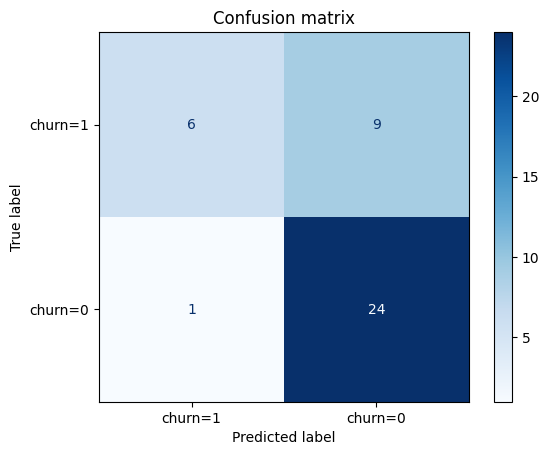

In [37]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predição, labels=[1,0])
cm_display       = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['churn=1','churn=0'])

cm_display.plot(cmap="Blues")
plt.title('Confusion matrix')
plt.show()

In [22]:
print (classification_report(y_test, y_predição))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Com base na contagem de cada seção, podemos calcular a precisão e a recuperação de cada rótulo:

*   **Precisão** é uma medida da precisão desde que um rótulo de classe tenha sido previsto. É definido por: precisão = TP / (TP + FP)

*   **Recall** é a taxa positiva verdadeira. É definido como: Recall =  TP / (TP + FN)

Assim, podemos calcular a precisão e o recall de cada classe.

**F1 score:**

Agora estamos em posição de calcular as pontuações F1 para cada rótulo com base na precisão e recuperação desse rótulo.

A pontuação F1 é a média harmônica da precisão e recall, onde uma pontuação F1 atinge seu melhor valor em 1 (precisão e recall perfeitos) e pior em 0. É uma boa maneira de mostrar que um classificador tem um bom valor para ambos recordação e precisão.

Por fim, podemos dizer que a precisão média desse classificador é a média da pontuação F1 para ambos os rótulos, que é 0,72 em nosso caso.